tracing essential components - Filtering & Edge Detection



explanation of how a computer start to understand the *content* of an image? How does it find objects, lines, and textures?

 We will explore the fundamental concept of **convolution**. We'll discover how a small matrix called a **kernel** can slide over an image to modify pixels based on their neighbors. This simple operation is the key to powerful techniques like blurring, sharpening, and, most importantly, **edge detection**—the first step towards identifying the structure of objects in an image.

### **Setup: Importing Libraries**

We'll continue using OpenCV, NumPy, and Matplotlib as our primary tools.

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Helper function to display images in a consistent way
def display_image(title, image, is_bgr=True):
    # Convert BGR to RGB for correct display in Matplotlib
    if is_bgr:
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    else:
        image_rgb = image
    plt.imshow(image_rgb, cmap='gray' if len(image.shape) == 2 else None)
    plt.title(title)
    plt.axis('off')
    plt.show()

print("Libraries imported successfully!")

Libraries imported successfully!


---

## **Part 1: The Convolution Operation**

Convolution is a mathematical operation where we take a small matrix called a **kernel** and slide it over our image. At each location, we multiply the kernel's values with the corresponding pixel values in the image patch underneath it and sum them up to get a new pixel value for our output image.

This process allows us to create a new image where each pixel is a function of its local neighborhood. By changing the numbers in the kernel, we can achieve different effects.

### **1.1 Image Blurring (Averaging)**

The simplest filter is an **averaging filter**, also known as a box blur. The kernel is a grid of ones, divided by the total number of elements. This replaces each pixel with the average value of its neighbors, resulting in a smoothing or blurring effect.

Let's create a 5x5 averaging kernel and apply it to an image using `cv2.filter2D()`.

Original image shape: (397, 600, 3)
--- 5x5 Averaging Kernel ---
[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


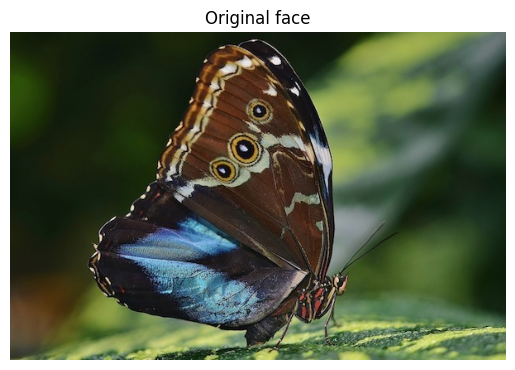

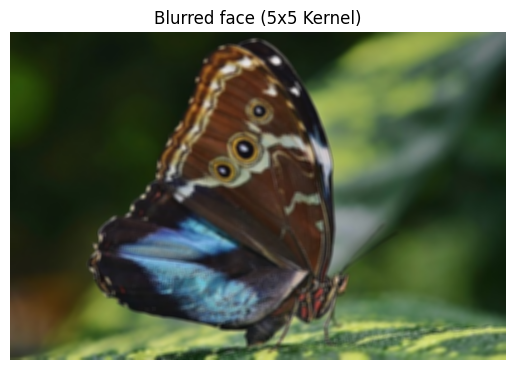

In [4]:
image_path = '/content/assets/butterfly.jpg'
image = cv2.imread(image_path)

print(f"Original image shape: {image.shape}")

# Define a 5x5 averaging kernel
kernel_size = 5
kernel = np.ones((kernel_size, kernel_size), dtype=np.float32) / (kernel_size**2)

print("--- 5x5 Averaging Kernel ---")
print(kernel)

# Apply the convolution
blurred_image = cv2.filter2D(image, ddepth=-1, kernel=kernel)

display_image("Original face", image)
display_image("Blurred face (5x5 Kernel)", blurred_image)

OpenCV provides convenient built-in functions for common filters like `cv2.blur()` (box blur) and `cv2.GaussianBlur()`. A Gaussian blur is similar to a box blur, but it uses a kernel where the center pixels have more weight, resulting in a smoother, more natural-looking blur.

Applied 11x11 Box Blur.
Applied 11x11 Gaussian Blur.


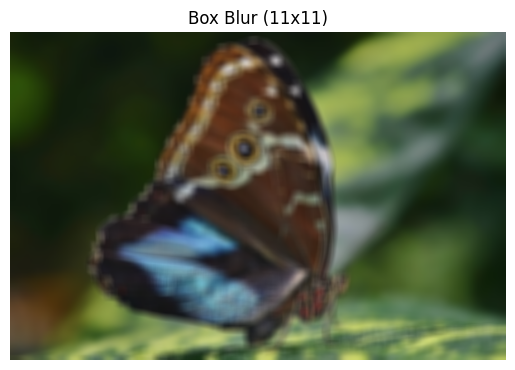

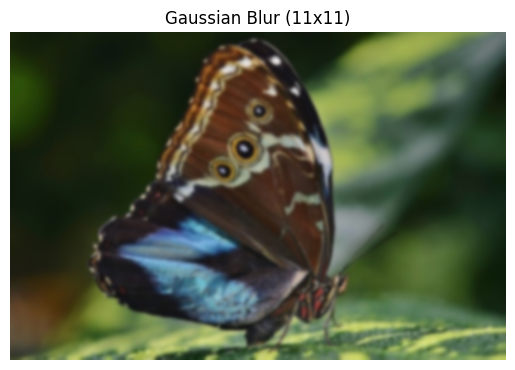

In [5]:
# Apply a larger box blur (11x11)
box_blur = cv2.blur(image, (11, 11))
print("Applied 11x11 Box Blur.")

# Apply a larger Gaussian blur (11x11)
gaussian_blur = cv2.GaussianBlur(image, (11, 11), 0)
print("Applied 11x11 Gaussian Blur.")

display_image("Box Blur (11x11)", box_blur)
display_image("Gaussian Blur (11x11)", gaussian_blur)

### **1.2 Image Sharpening**

If blurring is achieved by averaging, sharpening is achieved by accentuating differences between a pixel and its neighbors. We can design a kernel that does this by subtracting the values of neighboring pixels from an amplified center pixel.

--- Sharpening Kernel ---
[[-1 -1 -1]
 [-1  9 -1]
 [-1 -1 -1]]


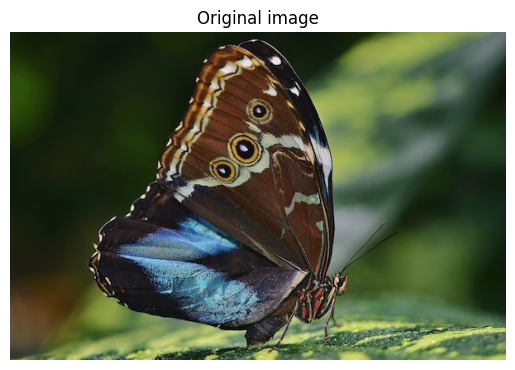

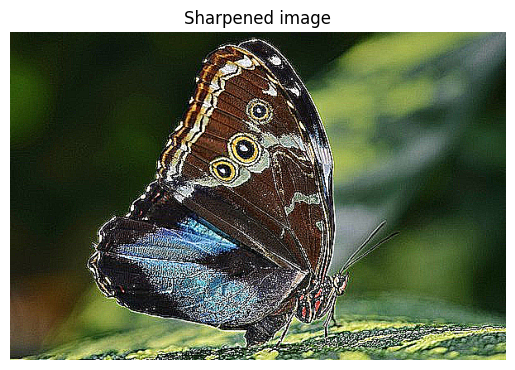

In [7]:
saturn_path = '/content/assets/butterfly.jpg'
saturn_img = cv2.imread(saturn_path)

# Define a sharpening kernel
# The center pixel is amplified, and the neighbors are subtracted.
sharpen_kernel = np.array([[-1, -1, -1],
                             [-1,  9, -1],
                             [-1, -1, -1]])

print("--- Sharpening Kernel ---")
print(sharpen_kernel)

# Apply the sharpening kernel via convolution
sharpened_saturn = cv2.filter2D(saturn_img, ddepth=-1, kernel=sharpen_kernel)

display_image("Original image", saturn_img)
display_image("Sharpened image", sharpened_saturn)

---

## **Part 2: Edge Detection**

An **edge** is a location in an image where there is a sharp change in intensity. Detecting these edges is the first step toward understanding the structure and boundaries of objects. Blurring smooths an image (low-pass filtering), while edge detection highlights areas of high frequency (high-pass filtering).

The most famous and widely used edge detection algorithm is **Canny Edge Detection**.

### **2.1 Canny Edge Detection**

The Canny algorithm is a multi-stage process that is very effective at finding clean, thin edges.

**The Key Idea (Hysteresis Thresholding):** Canny uses two thresholds:
- A **high threshold** to identify "sure edges" (pixels with a very strong intensity gradient).
- A **low threshold** to identify "weak but potential edges."

The algorithm keeps any weak edge pixel only if it is connected to a sure edge. This helps to eliminate noise while preserving the true, continuous edges of objects.

Converted image to grayscale for edge detection.


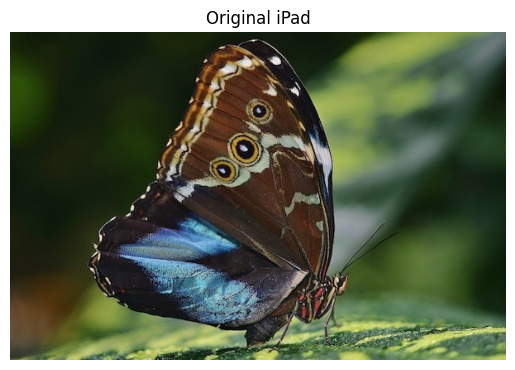

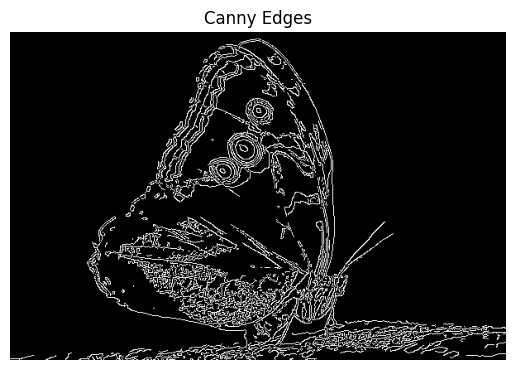

In [8]:
ipad_path = '/content/assets/butterfly.jpg'
ipad_img = cv2.imread(ipad_path)

# It's best practice to convert to grayscale for edge detection
gray_ipad = cv2.cvtColor(ipad_img, cv2.COLOR_BGR2GRAY)
print("Converted image to grayscale for edge detection.")

# Apply Canny Edge Detection
low_threshold = 100
high_threshold = 200
edges = cv2.Canny(gray_ipad, low_threshold, high_threshold)

display_image("Original iPad", ipad_img)
display_image("Canny Edges", edges, is_bgr=False)

### **2.2 The Power of Combining Blur and Canny**

A very common and effective pipeline is to **blur an image *before* running Canny**. The blur smooths out minor textures and noise, allowing the Canny algorithm to focus only on the more significant, structural edges.

Generated edges without pre-blurring.
Applied a 7x7 Gaussian Blur.
Generated edges *after* pre-blurring.


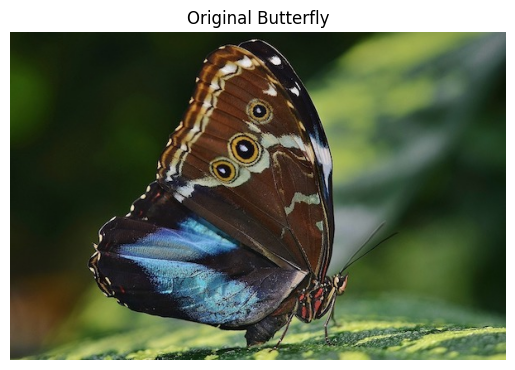

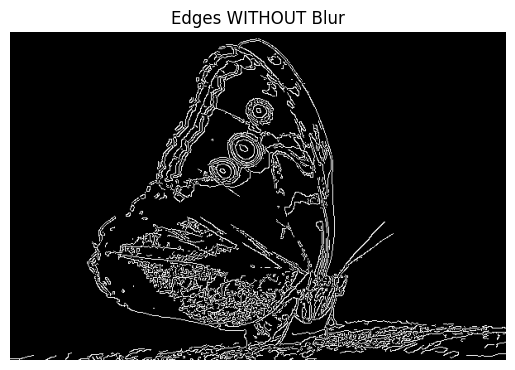

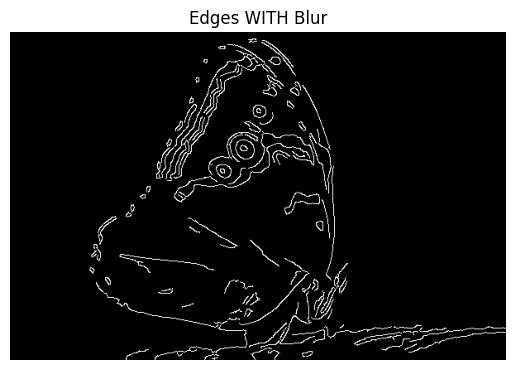

In [9]:
butterfly_path = '/content/assets/butterfly.jpg'
butterfly_img = cv2.imread(butterfly_path)
gray_butterfly = cv2.cvtColor(butterfly_img, cv2.COLOR_BGR2GRAY)

# Edges without blurring - lots of texture noise
edges_no_blur = cv2.Canny(gray_butterfly, 100, 200)
print("Generated edges without pre-blurring.")

# Blur the image first
blurred_butterfly = cv2.GaussianBlur(gray_butterfly, (7, 7), 0)
print("Applied a 7x7 Gaussian Blur.")

# Edges with blurring - much cleaner!
edges_with_blur = cv2.Canny(blurred_butterfly, 100, 200)
print("Generated edges *after* pre-blurring.")

# Display results
display_image("Original Butterfly", butterfly_img)
display_image("Edges WITHOUT Blur", edges_no_blur, is_bgr=False)
display_image("Edges WITH Blur", edges_with_blur, is_bgr=False)


##Conclusion:

1.  **Convolution** is a powerful technique where a **kernel** slides over an image to modify pixels based on their neighbors.
2.  We can use different kernels to achieve effects like **blurring** (averaging) and **sharpening** (accentuating differences).
3.  **Canny Edge Detection** is the standard algorithm for finding clean, structural edges in an image, and it works best when combined with a pre-processing blur to remove noise.

